In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV,cross_validate
import sklearn.metrics as metrics 

# algorithms
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV


# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import mean_squared_error, r2_score ,explained_variance_score,accuracy_score

# Models we will use :
- XGBoost
- AdaBoost
- LightGBM
- CatBoost
- Random Forest


In [126]:
# Load the data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
cols=[]
n_unique=[]
unique_values=[]
col_dtype=[]
for col in df.columns:
    cols.append(col)
    n_unique.append(df[col].nunique())
    unique_values.append(df[col].unique())
    col_dtype.append(df[col].dtype)
col_dict={'Column':cols,'Number of Unique Values':n_unique,'Unique Values':unique_values,'Data Type':col_dtype}
pd.DataFrame(col_dict)

,Column,Number of Unique Values,Unique Values,Data Type
0,age,47,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...",int64
1,sex,2,"[female, male]",object
2,bmi,548,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...",float64
3,children,6,"[0, 1, 3, 2, 5, 4]",int64
4,smoker,2,"[yes, no]",object
5,region,4,"[southwest, southeast, northwest, northeast]",object
6,charges,1337,"[16884.924, 1725.5523, 4449.462, 21984.47061, ...",float64


In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols=df.select_dtypes(exclude=['object', 'category']).columns.tolist()

### Data visualization

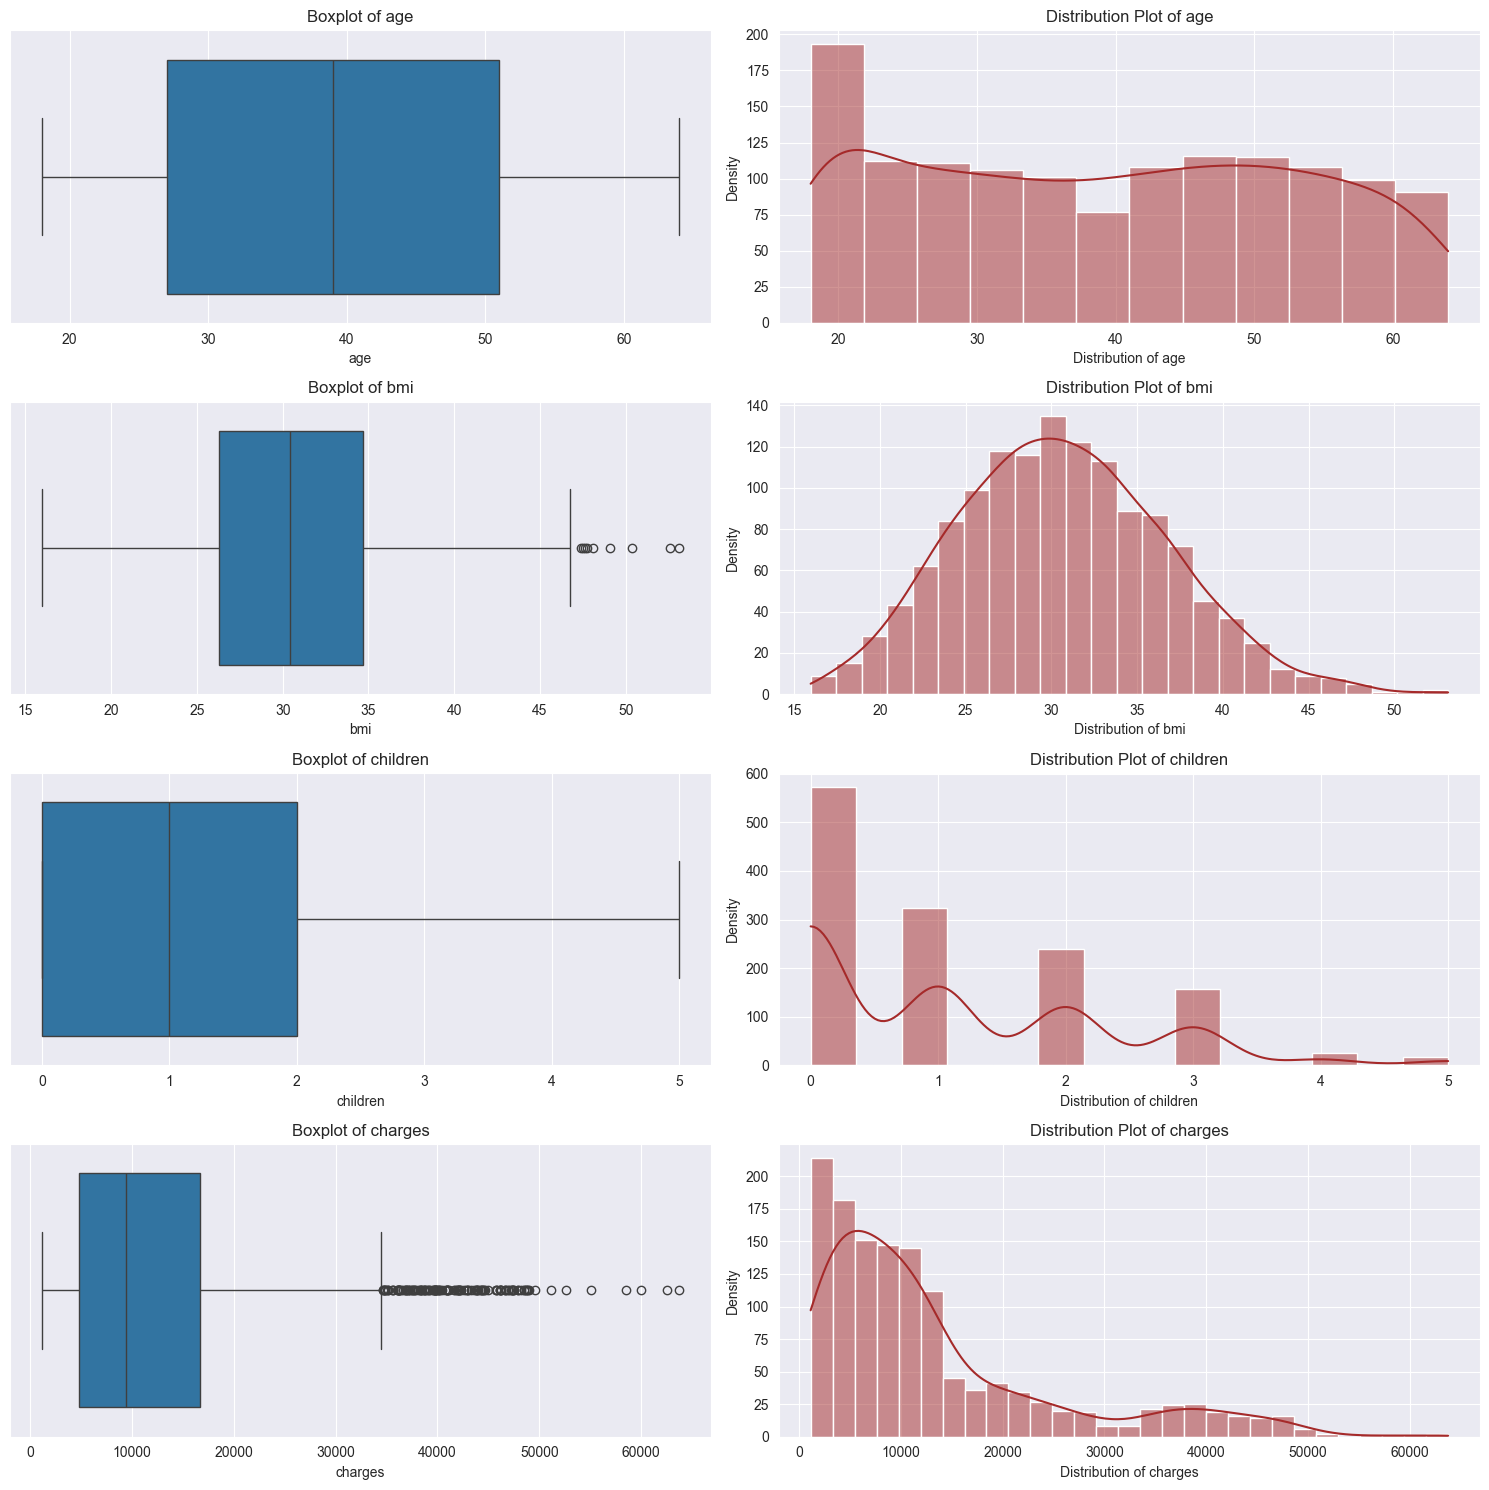

In [56]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols):
    # Boxplot
    plt.subplot(4, 2, 2*i+1)   
    sns.boxplot(df[col], orient='h')
    plt.xlabel(f"{col}")
    plt.title(f"Boxplot of {col}")

    # Distribution plot
    plt.subplot(4, 2, 2*i+2)   
    sns.histplot(df[col], kde=True, color='brown')
    plt.xlabel(f"Distribution of {col}")
    plt.ylabel('Density')
    plt.title(f"Distribution Plot of {col}")

plt.tight_layout()
plt.show()


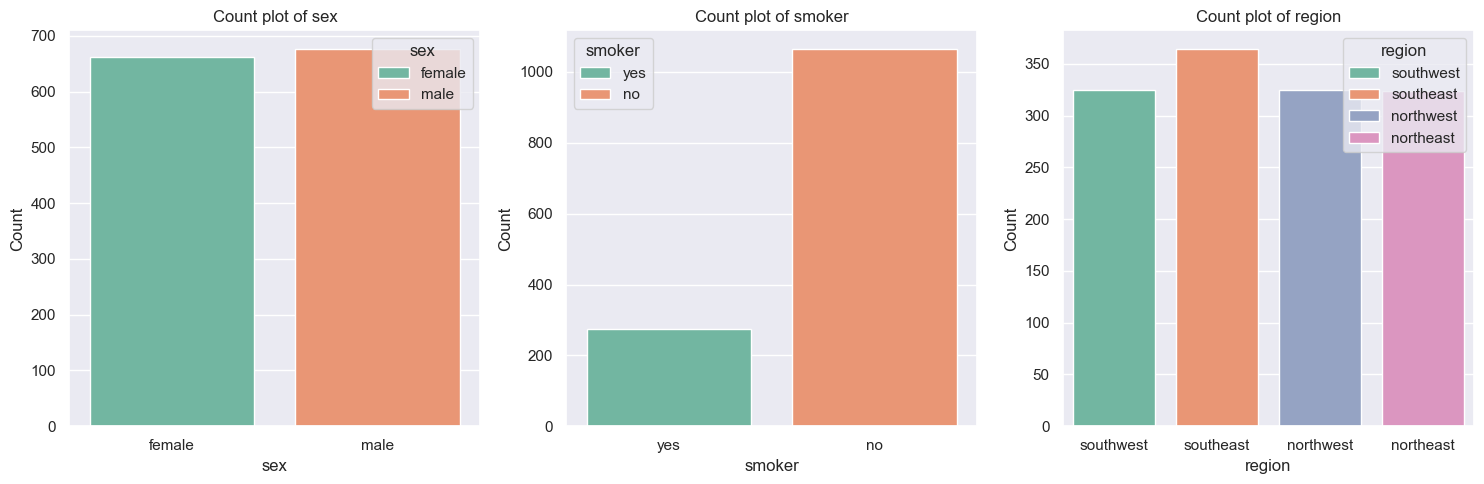

In [99]:
plt.figure(figsize=(15,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[col],palette='Set2',hue=df[col],legend=True)
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

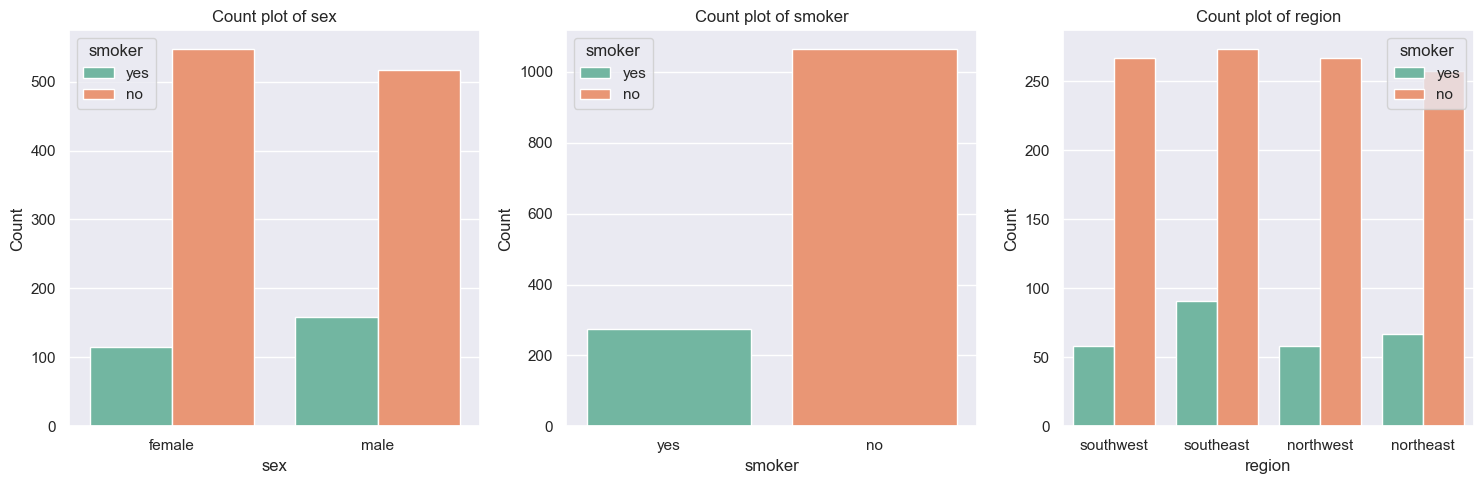

In [100]:
plt.figure(figsize=(15,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,3,i+1)
    sns.countplot(x=col,data=df,palette='Set2',hue='smoker',legend=True)
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

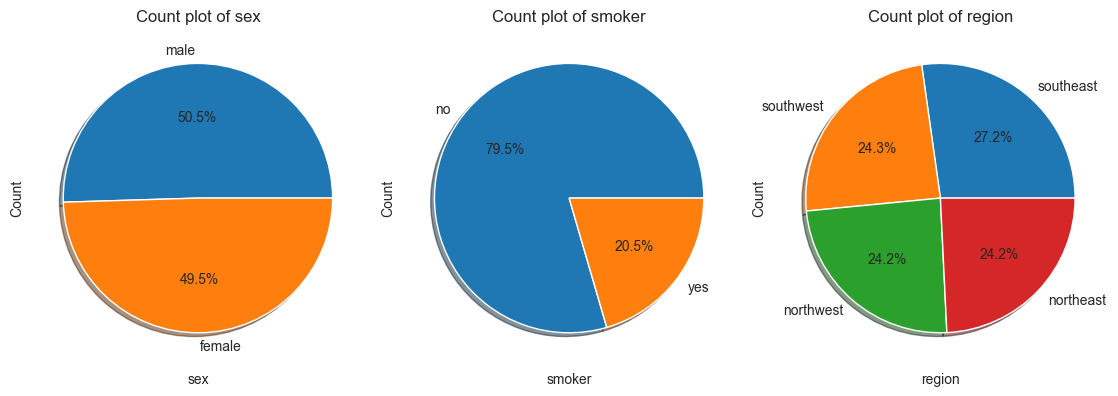

In [51]:
plt.figure(figsize=(15,8))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,4,i+1)
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index,autopct='%1.1f%%',shadow=True)
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

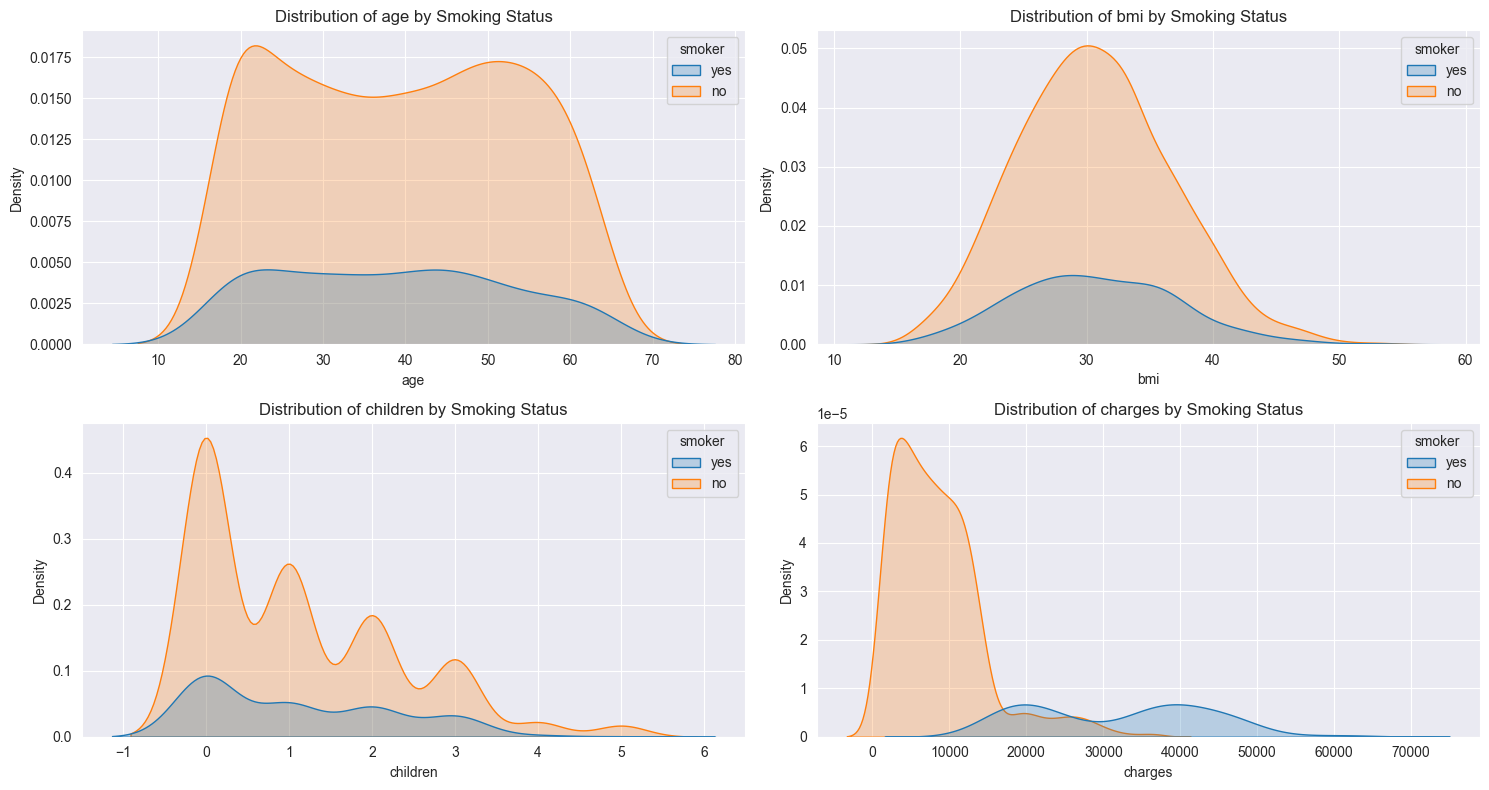

In [52]:
plt.figure(figsize=(15,8))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[col],hue=df['smoker'],fill=True)
    plt.title(f'Distribution of {col} by Smoking Status')
    plt.tight_layout()
plt.show()

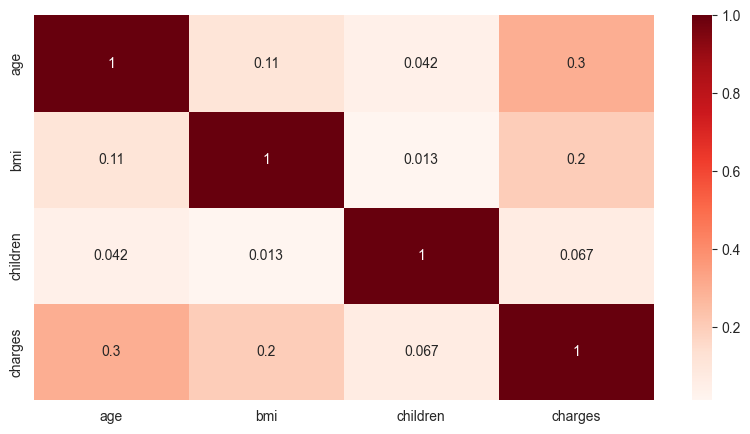

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='Reds')
plt.show()

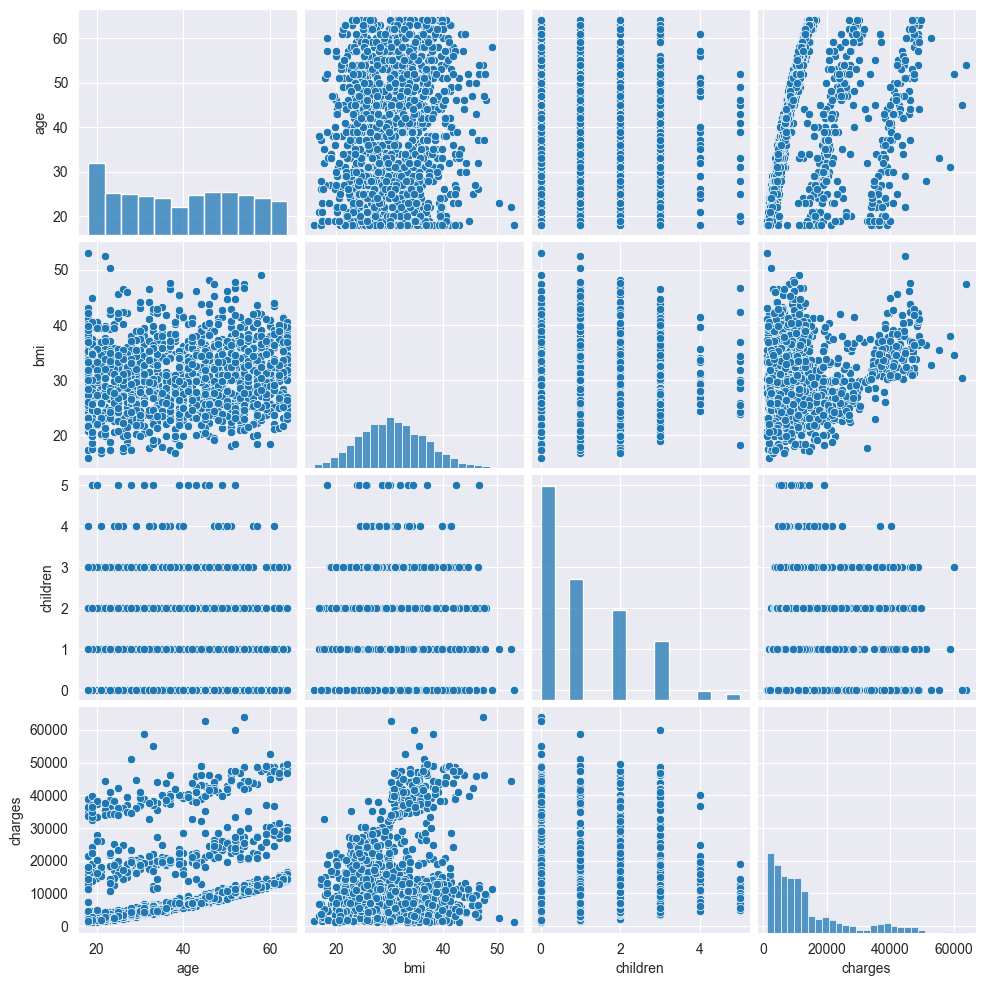

In [54]:
sns.pairplot(df)
plt.show()

### Checking for outliers

### Outlier detection using IQR and Z-Score

In [57]:
Q1=df['charges'].quantile(0.25)
Q3=df['charges'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier_iqr=(df['charges']<lower_bound) | (df['charges']>upper_bound)
print(len(df[outlier_iqr]))


# Z-Score
mean=df['charges'].mean()
std_dev=df['charges'].std()
threshold=3
outlier_zscore=(abs((df['charges'] - mean) / std_dev) > threshold)
print(len(df[outlier_zscore]))


# Get common outliers (those labeled as True in both methods)
common_outlier_univariate = outlier_iqr & outlier_zscore
print(len(df[common_outlier_univariate]))
df[common_outlier_univariate]

139
7
7


,age,sex,bmi,children,smoker,region,charges,children_count
34,28,male,36.400,1,yes,southwest,51194.55914,one
543,54,female,47.410,0,yes,southeast,63770.42801,Has No Children
577,31,female,38.095,1,yes,northeast,58571.07448,one
819,33,female,35.530,0,yes,northwest,55135.40209,Has No Children
1146,60,male,32.800,0,yes,southwest,52590.82939,Has No Children
1230,52,male,34.485,3,yes,northwest,60021.39897,three
1300,45,male,30.360,0,yes,southeast,62592.87309,Has No Children


# Outlier detection using LOF and IsolationForest

In [58]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

clf = IsolationForest()
clf.fit(df[numerical_cols])
outliers_if = clf.predict(df[numerical_cols])  


lof = LocalOutlierFactor(n_neighbors=10)
outliers_lof = lof.fit_predict(df[numerical_cols])  

# Get common outliers (those labeled as -1 in both methods)
common_outliers_multivariate = (outliers_if == -1) & (outliers_lof == -1)
print(len(df[common_outliers_multivariate]))
df[common_outliers_multivariate]

9


,age,sex,bmi,children,smoker,region,charges,children_count
34,28,male,36.400,1,yes,southwest,51194.55914,one
64,20,female,22.420,0,yes,northwest,14711.74380,Has No Children
507,21,male,23.750,2,no,northwest,3077.09550,two
543,54,female,47.410,0,yes,southeast,63770.42801,Has No Children
577,31,female,38.095,1,yes,northeast,58571.07448,one
819,33,female,35.530,0,yes,northwest,55135.40209,Has No Children
1146,60,male,32.800,0,yes,southwest,52590.82939,Has No Children
1230,52,male,34.485,3,yes,northwest,60021.39897,three
1300,45,male,30.360,0,yes,southeast,62592.87309,Has No Children


In [59]:
df[common_outlier_univariate&common_outliers_multivariate]

,age,sex,bmi,children,smoker,region,charges,children_count
34,28,male,36.400,1,yes,southwest,51194.55914,one
543,54,female,47.410,0,yes,southeast,63770.42801,Has No Children
577,31,female,38.095,1,yes,northeast,58571.07448,one
819,33,female,35.530,0,yes,northwest,55135.40209,Has No Children
1146,60,male,32.800,0,yes,southwest,52590.82939,Has No Children
1230,52,male,34.485,3,yes,northwest,60021.39897,three
1300,45,male,30.360,0,yes,southeast,62592.87309,Has No Children


In [60]:
univariate_outliers = outlier_iqr | outlier_zscore
multivariate_outliers = (outliers_if == -1) | (outliers_lof == -1)
final_outliers = df[univariate_outliers & multivariate_outliers]
final_outliers

,age,sex,bmi,children,smoker,region,charges,children_count
14,27,male,42.130,0,yes,southeast,39611.75770,Has No Children
19,30,male,35.300,0,yes,southwest,36837.46700,Has No Children
23,34,female,31.920,1,yes,northeast,37701.87680,one
29,31,male,36.300,2,yes,southwest,38711.00000,two
30,22,male,35.600,0,yes,southwest,35585.57600,Has No Children
...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,Has No Children
1301,62,male,30.875,3,yes,northwest,46718.16325,three
1303,43,male,27.800,0,yes,southwest,37829.72420,Has No Children
1313,19,female,34.700,2,yes,southwest,36397.57600,two


### Outlier Detection Approach

This approach ensures the outliers are considered only if they are flagged by both types of methods (univariate and multivariate). However, since we have limited data (only 1337 points), and this approach identified 139 points as outliers, we cannot confidently make decisions based on this small sample size. Therefore, it may be more appropriate to rely solely on the univariate methods (IQR and Z-Score) for this analysis.


### Removing the outliers

the Boolean series doesn't have the same length or if there are misalignments between the index of the Boolean mask and the dataframe.

To fix this, you need to ensure that the Boolean mask has the same index as the dataframe

In [127]:
common_outlier_univariate=common_outlier_univariate.reindex(df.index,fill_value=False)
df = df[~common_outlier_univariate]
df.shape

(1338, 7)

### Data Preprocessing

In [128]:
# Trying to get new features from the data with high correlation 
df['age_bmi_interaction'] = df['age'] * df['bmi']

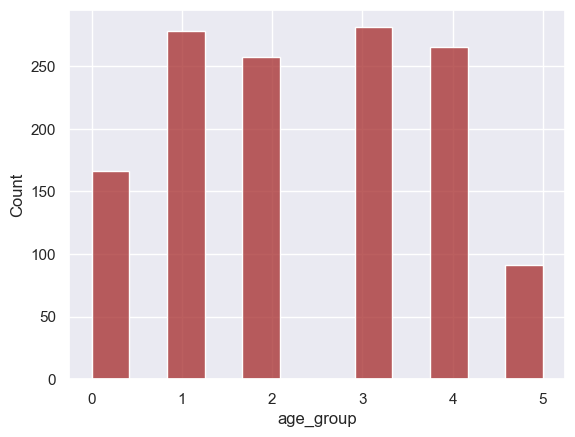

In [129]:
# Grouping the ages into different categories
bins = [0, 20, 30, 40, 50, 60, df['age'].max()]
labels = [0, 1, 2, 3, 4, 5]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)  
df['age_group']=df['age_group'].astype('int')
sns.histplot(df['age_group'],color='brown')

plt.show()

In [130]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix['age_bmi_interaction'].sort_values(ascending=False)

age_bmi_interaction    1.000000
age                    0.879840
age_group              0.866634
bmi                    0.539637
charges                0.334754
children               0.043180
Name: age_bmi_interaction, dtype: float64

In [131]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols=df.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [132]:
print(categorical_cols)
print(numerical_cols)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges', 'age_bmi_interaction', 'age_group']


In [133]:
numerical_cols.remove('charges')
numerical_cols

['age', 'bmi', 'children', 'age_bmi_interaction', 'age_group']

In [134]:
X=df.drop(['charges'],axis=1)
y=df['charges']

In [135]:
print(X.columns)
print(numerical_cols)
print(categorical_cols)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'age_bmi_interaction', 'age_group'],
      dtype='object')
['age', 'bmi', 'children', 'age_bmi_interaction', 'age_group']
['sex', 'smoker', 'region']


### Splitting the data

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=X['smoker'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,stratify=X_train['smoker'])

In [140]:
num_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
cat_pipeline = Pipeline(steps=[('encoder', OneHotEncoder())])
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ],
    remainder='passthrough'
)
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.transform(X_test)
X_val=full_pipeline.transform(X_val)

In [141]:
print(f"the X_train shape is {X_train.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_test shape is {y_test.shape}")
print(f"the X_val shape is {X_val.shape}")
print(f"the y_val shape is {y_val.shape}")

the X_train shape is (963, 13)
the y_train shape is (963,)
the X_test shape is (268, 13)
the y_test shape is (268,)
the X_val shape is (107, 13)
the y_val shape is (107,)


In [142]:
X_train

array([[ 1.5823712 ,  0.44847879, -0.91076254, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18640979,  0.21397731, -0.91076254, ...,  1.        ,
         0.        ,  0.        ],
       [-1.39939295, -0.0361576 ,  0.75034414, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.1564049 , -1.53203017, -0.0802092 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.6894491 , -0.17685848,  0.75034414, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73043859, -1.25556527,  0.75034414, ...,  1.        ,
         0.        ,  0.        ]])

## Model Training
#### Model Evaluation

In [180]:
def model_evaluation(y_pred, y_test, model, X_train, y_train):
    # Print evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Perform cross-validation on the training data
    cross_score = cross_val_score(model, X_train, y_train, cv=5)
    
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Explained Variance: {explained_var:.4f}")
    print(f"Cross Validation Score: {cross_score.mean():.4f}")
    
    # Display predictions and actual values
    display(pd.DataFrame(np.c_[y_pred, y_test], columns=["Prediction", "Actual"]))
    
    # Return metrics
    return rmse, r2, cross_score.mean()

In [305]:
# Initialize result dictionary
results = {
    'Model': [],
    'RMSE': [],
    'R2': [],
    'CVS':[]
}

# Function to append results
def append_results(model_name, rmse,r2,cross_score):
    results['Model'].append(model_name)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['CVS'].append(cross_score.mean())


In [168]:
def calc_residuals(y_test_c, y_pred_c):
    plt.figure(figsize=(10, 10))
    residuals = y_test_c - y_pred_c
    sns.scatterplot(x=y_test_c, y=residuals, color='blue', alpha=0.8)
    plt.title('Residual Plot: Model Performance Analysis')
    plt.xlabel('Predicted Medical Cost', color="r")
    plt.ylabel('Residuals (Actual - Predicted)',color="g")
    plt.grid(True,alpha=.8)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.fill_between([y_test_c.min(), y_test_c.max()], -1000, 1000, color='r', alpha=0.1)
    plt.show()

## 1. XGBoost
- `n_estimators`: Number of boosting rounds (trees) to build. More trees can increase performance but also risk overfitting.
- `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but might overfit.
- `learning_rate`: Step size shrinking to prevent overfitting and to improve model generalization. Lower values require more boosting rounds.
- `subsample`: Fraction of samples used for fitting each individual tree. Values between 0.5 and 1 are often used to prevent overfitting.
- `alpha`: L1 regularization term on weights. Helps to prevent overfitting by adding a penalty for large weights.
- `reg_alpha`: L1 regularization term on weights. Helps with model sparsity and feature selection.
- `reg_lambda`: L2 regularization term on weights. Helps with model generalization.
- `colsample_bylevel`: Fraction of features used for each level of trees. Controls the diversity of trees.
- `colsample_bytree`: Fraction of features used for each tree. Helps prevent overfitting.
- `colsample_bynode`: Fraction of features used for each node in each tree. Controls overfitting.
- `gamma`: Minimum loss reduction required to make a further partition on a leaf node. Helps control the complexity of the model.
- `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child. Larger values make the algorithm more conservative.


In [147]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror'  # Specify the objective function
)

In [148]:
# Define the hyperparameter grid
param_xgb={
    'max_depth': [3, 5, 7, 9, 11], 
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'n_estimators': [50,100,200,500, 1000],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7, 10, 15],
    'reg_alpha': [0.1, 0.3, 0.5, 1.0],
    'reg_lambda': [0.5, 0.7, 0.9, 1.0, 1.2],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bynode': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

In [150]:
# Perform RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    xgb_model, 
    param_xgb, 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    scoring='neg_mean_squared_error', 
    n_iter=100,  
    random_state=42  
)

# Fit the model
xgb_search.fit(X_train, y_train, eval_set=[(X_val, y_val)])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-rmse:10906.06863
[1]	validation_0-rmse:10664.99479
[2]	validation_0-rmse:10408.79377
[3]	validation_0-rmse:10153.08143
[4]	validation_0-rmse:9906.99937
[5]	validation_0-rmse:9874.97063
[6]	validation_0-rmse:9644.03810
[7]	validation_0-rmse:9420.68766
[8]	validation_0-rmse:9205.98238
[9]	validation_0-rmse:8998.45595
[10]	validation_0-rmse:8797.41556
[11]	validation_0-rmse:8606.00663
[12]	validation_0-rmse:8421.51780
[13]	validation_0-rmse:8242.59329
[14]	validation_0-rmse:8073.31606
[15]	validation_0-rmse:7903.78709
[16]	validation_0-rmse:7747.71687
[17]	validation_0-rmse:7588.44195
[18]	validation_0-rmse:7443.71338
[19]	validation_0-rmse:7429.73810
[20]	validation_0-rmse:7289.68601
[21]	validation_0-rmse:7151.27290
[22]	validation_0-rmse:7019.90169
[23]	validation_0-rmse:6892.41954
[24]	validation_0-rmse:6772.44374
[25]	validation_0-rmse:6654.22383
[26]	validation_0-rmse:6542.42766
[27]	validation_0-rmse:64

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_child_weight': [1, 3, 5, 7, 10,
                                                             15],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'reg_alpha': [0.1, 0.3, 0.5, 1.0],
                                        'reg_lambda': [0.5, 0.7, 0.9, 1.0, 1.2],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [151]:
xgb_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 1.0,
 'reg_alpha': 0.1,
 'n_estimators': 200,
 'min_child_weight': 15,
 'max_depth': 3,
 'learning_rate': 0.03,
 'gamma': 0.1,
 'colsample_bytree': 0.8,
 'colsample_bynode': 1.0,
 'colsample_bylevel': 1.0}

In [192]:
xgb_model=xgb_search.best_estimator_
y_pred_xgb = xgb_model.predict(X_test)

In [193]:
# Perform cross-validation on the training data
cross_score = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

Cross Validation Score: [0.84665294 0.88207994 0.85117963 0.83519199 0.87004554]
Mean Cross Validation Score: 0.8570


In [194]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.'*50)
y_val_pred = xgb_model.predict(X_val)

# Calculate evaluation metrics on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
Validation Root Mean Squared Error: 4421.45
Validation R2 Score: 0.8434
Validation Explained Variance: 0.8434


In [306]:
rmse_xgb,r2_xgb,cross_score_xgb =model_evaluation(y_pred_xgb, y_test, xgb_model, X_train, y_train)
append_results('XGBoost', rmse_xgb,r2_xgb,cross_score_xgb)

Root Mean Squared Error: 4178.77
R2 Score: 0.8816
Explained Variance: 0.8822
Cross Validation Score: 0.8570


,Prediction,Actual
0,8764.590820,6799.45800
1,5319.943359,4243.59005
2,14526.017578,13415.03810
3,7572.954102,6079.67150
4,4546.501953,22493.65964
...,...,...
263,47637.843750,48173.36100
264,10480.976562,8547.69130
265,34574.570312,34303.16720
266,16441.109375,14119.62000


In [196]:
# show the feature importance 
xgb_model.feature_importances_

array([0.02313271, 0.04736523, 0.00573362, 0.01854371, 0.05019351,
       0.00202584, 0.00223697, 0.50026923, 0.3399307 , 0.00427098,
       0.00133965, 0.0033828 , 0.00157498], dtype=float32)

#### Calculate residuals


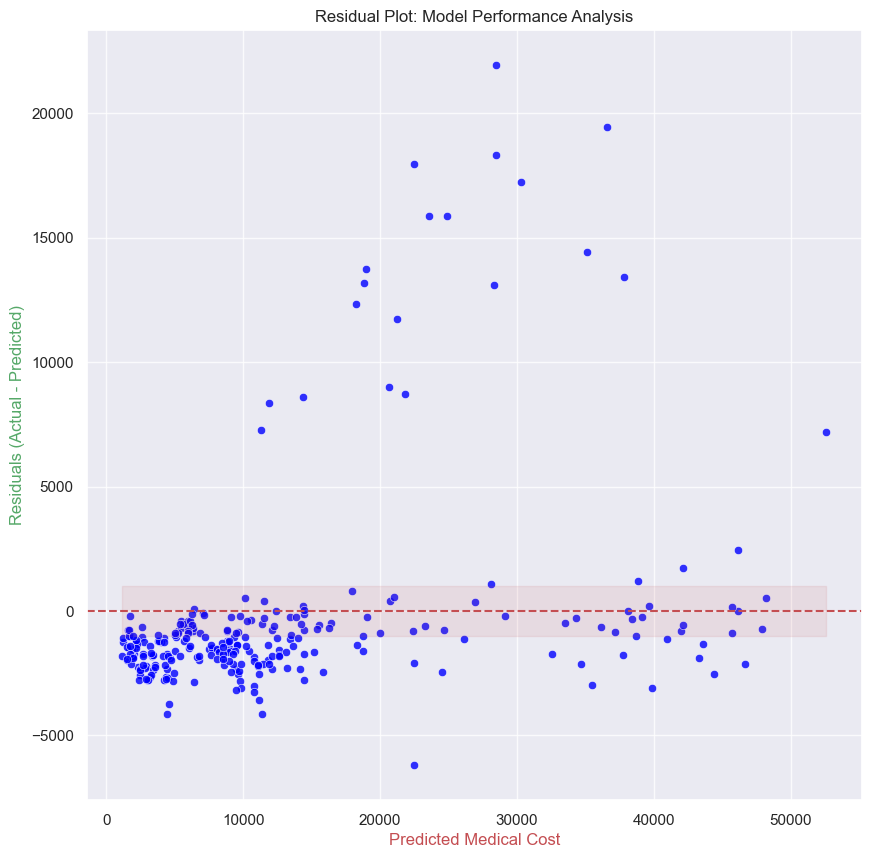

In [197]:
calc_residuals(y_test, y_pred_xgb)

## 2. AdaBoost
#### AdaBoostRegressor Hyperparameters

- `n_estimators`: Number of boosting stages to be run. More stages usually improve the performance of the model but also increase training time and risk of overfitting.
  - Example values: `[50, 100, 150, 200]`

- `learning_rate`: The rate at which the contribution of each weak learner is scaled. Lower values require more boosting stages to maintain performance but can lead to better generalization.
  - Example values: `[0.01, 0.1, 0.5, 1.0]`

- `loss`: The loss function to use, which impacts how the model adjusts the weights of weak learners. 
  - `'linear'`: Linear loss function.
  - `'square'`: Squared loss function, also known as L2 loss.
  - `'exponential'`: Exponential loss function, which can be more sensitive to outliers.
  - Example values: `['linear', 'square', 'exponential']`


In [271]:
ada_boost = AdaBoostRegressor(random_state=42)

params = {
    "n_estimators": np.arange(10, 200, 10),
    'learning_rate': np.arange(0.1, 1, 0.01),
    "loss": ['linear', 'square', 'exponential'],
}

ada_search = RandomizedSearchCV(ada_boost, params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error', n_iter=100,)
ada_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0...
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   scoring='neg_mean_squared_error', verbose=1)

In [272]:
ada_search.best_params_

{'n_estimators': 10, 'loss': 'exponential', 'learning_rate': 0.12}

In [273]:
ada_model=ada_search.best_estimator_
y_pred_ada = ada_model.predict(X_test)

In [274]:
# Perform cross-validation on the training data
cross_score = cross_val_score(ada_model, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

Cross Validation Score: [0.83605154 0.8672268  0.83969689 0.83920575 0.86263127]
Mean Cross Validation Score: 0.8490


In [275]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.' * 50)
y_val_pred = ada_model.predict(X_val)

# Calculate evaluation metrics on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
Validation Root Mean Squared Error: 4513.11
Validation R2 Score: 0.8368
Validation Explained Variance: 0.8372


In [307]:
rmse_ada, r2_ada, cross_score_ada = model_evaluation(y_pred_ada, y_test, ada_model, X_train, y_train)
append_results('AdaBoost', rmse_ada, r2_ada, cross_score_ada)

Root Mean Squared Error: 4547.22
R2 Score: 0.8598
Explained Variance: 0.8631
Cross Validation Score: 0.8490


,Prediction,Actual
0,7508.213684,6799.45800
1,7172.015578,4243.59005
2,13882.712172,13415.03810
3,7172.015578,6079.67150
4,3866.190810,22493.65964
...,...,...
263,45408.246717,48173.36100
264,10747.454657,8547.69130
265,36889.801426,34303.16720
266,13882.712172,14119.62000


In [277]:
ada_model.feature_importances_

array([0.09176078, 0.17191509, 0.00405205, 0.02155299, 0.        ,
       0.        , 0.00041348, 0.29857316, 0.41173245, 0.        ,
       0.        , 0.        , 0.        ])

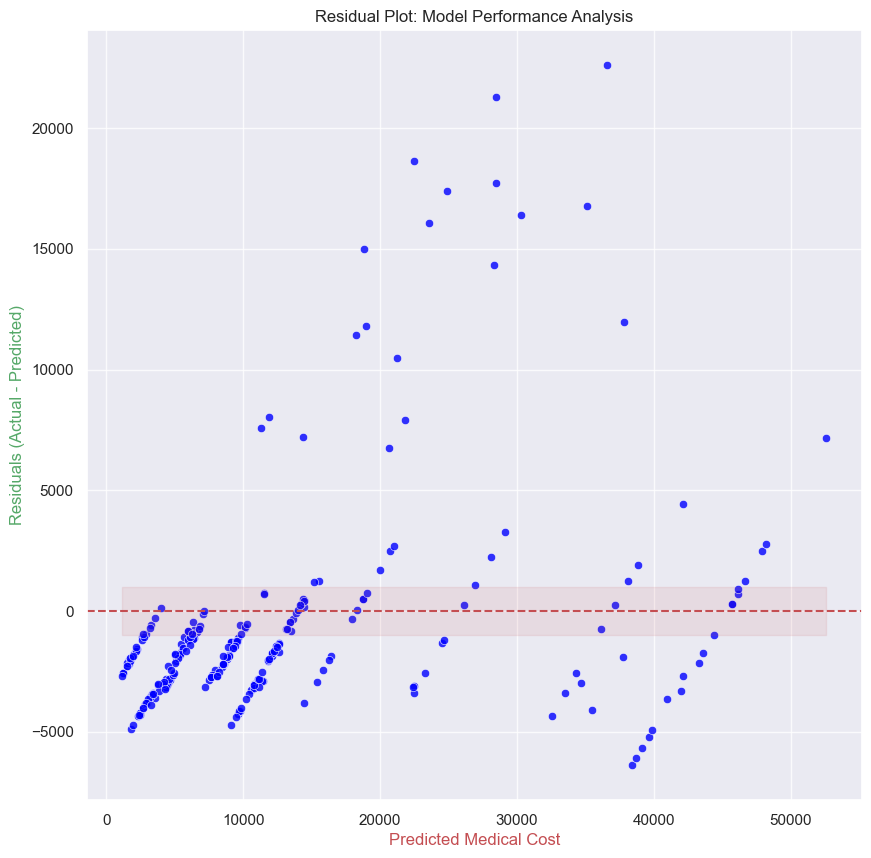

In [278]:
calc_residuals(y_test, y_pred_ada)

## 3. LightGBM
#### LGBMRegressor Hyperparameters

- `n_estimators`: Number of boosting iterations (trees) to build. More trees can improve performance but also increase the risk of overfitting and computation time.
  - Example values: `np.arange(10, 200, 5)`

- `max_depth`: Maximum depth of each tree. Limits the depth of each tree to control complexity and prevent overfitting.
  - Example values: `np.arange(3, 10, 1)`

- `learning_rate`: Step size shrinking to improve model generalization. Lower values require more boosting iterations to achieve similar performance.
  - Example values: `np.arange(0.1, 1, 0.1)`

- `subsample`: Fraction of samples used for fitting each tree. Values between 0.1 and 1 help to prevent overfitting by adding randomness.
  - Example values: `np.arange(0.1, 1, 0.1)`

- `reg_alpha`: L1 regularization term on weights. Helps to prevent overfitting by adding a penalty for large weights.
  - Example values: `np.arange(0.1, 1, 0.1)`

- `min_split_gain`: Minimum gain required to make a further partition on a leaf node. Higher values prevent overfitting by ensuring that splits improve the model significantly.
  - Example values: `np.arange(1, 5, 0.5)`

- `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child. Helps to prevent overfitting by ensuring each leaf contains a sufficient number of samples.
  - Example values: `np.arange(1, 10, 1)`


In [261]:
lightgbm = LGBMRegressor(random_state=42)

params={
    "n_estimators":np.arange(10,200,5),
    'max_depth':np.arange(3,10,1),
    'learning_rate':np.arange(0.1,1,0.1),
    'subsample':np.arange(0.1,1,0.1),
    'reg_alpha':np.arange(0.1,1,0.1),
    'min_split_gain ':np.arange(1,5,0.5),
    'min_child_weight':np.arange(1,10,1)
}
lgbm_search=RandomizedSearchCV(lightgbm,params,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error',n_iter=200)
lgbm_search.fit(X_train,y_train,eval_set=[(X_val, y_val)])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 13
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Info] Start training from score 13229.310462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_split_gain ': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]),
                                        'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [262]:
lgbm_search.best_params_

{'subsample': 0.30000000000000004,
 'reg_alpha': 0.8,
 'n_estimators': 15,
 'min_split_gain ': 3.5,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.4}

In [263]:
lgbm_model=lgbm_search.best_estimator_

In [264]:
y_pred_lgbm=lgbm_model.predict(X_test)

[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5


In [265]:
# Perform cross-validation on the training data
cross_score = cross_val_score(lgbm_model, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 770, number of used features: 13
[LightGBM] [Info] Start training from score 13573.653046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [266]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.' * 50)
y_val_pred = lgbm_model.predict(X_val)

# Calculate evaluation metrics on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
Validation Root Mean Squared Error: 4380.98
Validation R2 Score: 0.8463
Validation Explained Variance: 0.8463


In [308]:
rmse_gbm, r2_gbm, cross_score_gbm = model_evaluation(y_pred_lgbm, y_test, lgbm_model, X_train, y_train)
append_results('LightGBM', rmse_gbm, r2_gbm, cross_score_gbm)

[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Warning] min_split_gain is set=0.0, min_split_gain= will be ignored. Current value: min_split_gain=0.0
[LightGBM] [Warning] Unknown parameter: 3.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 770, number of used features: 13
[LightGBM] [Info] Start training from score 13573.653046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

,Prediction,Actual
0,8772.213662,6799.45800
1,5458.385304,4243.59005
2,14625.736512,13415.03810
3,7661.514922,6079.67150
4,4028.188892,22493.65964
...,...,...
263,47736.786249,48173.36100
264,10920.904837,8547.69130
265,36053.464683,34303.16720
266,17671.828203,14119.62000


In [268]:
lgbm_model.feature_importances_

array([17, 22, 10, 24,  0,  4,  0,  9,  0,  4,  0,  0,  1])

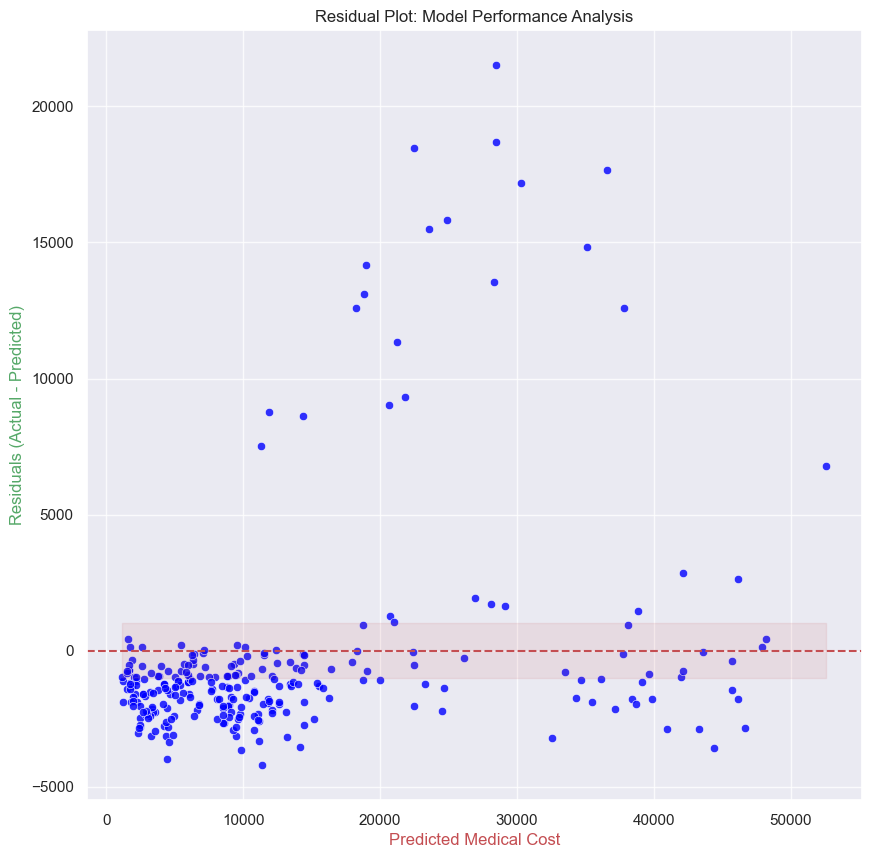

In [269]:
calc_residuals(y_test, y_pred_lgbm)

## 4. CatBoost
#### CatBoostRegressor Hyperparameters

- `iterations`: Number of boosting iterations (trees) to build. Increasing the number of iterations can improve model performance but also increases training time.
  - Example values: `np.arange(10, 200, 10)`

- `depth`: Depth of the trees. Determines how deep each tree in the ensemble can grow. Larger depths allow the model to capture more complex patterns but may lead to overfitting.
  - Example values: `np.arange(3, 10, 1)`

- `learning_rate`: Step size shrinking to improve model generalization. Lower values require more boosting iterations to achieve similar results.
  - Example values: `np.arange(0.01, 1.1, 0.1)`

- `subsample`: Fraction of samples used for fitting each tree. Values between 0.1 and 1 help to reduce overfitting by adding randomness.
  - Example values: `np.arange(0.1, 1.1, 0.1)`

- `l2_leaf_reg`: L2 regularization on leaf weights. Helps to prevent overfitting by adding a penalty for large leaf weights.
  - Example values: `np.arange(0.1, 10, 0.1)`

- `min_child_samples`: Minimum number of samples required in a leaf node. Larger values can help to prevent overfitting by ensuring that leaf nodes contain more samples.
  - Example values: `np.arange(1, 20, 1)`


In [235]:
cat_reg=CatBoostRegressor()
params = {
    "iterations": np.arange(10, 200, 10),  
    'depth': np.arange(3, 10, 1),            
    'learning_rate': np.arange(0.01, 1.1, 0.1),   
    'subsample': np.arange(0.1, 1, 0.1),   
    'l2_leaf_reg': np.arange(0.1, 10, 0.1),  
    'min_child_samples': np.arange(3, 20, 1)  
}
cat_search=RandomizedSearchCV(cat_reg,params,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error',n_iter=200)

In [236]:
cat_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0:	learn: 11233.8814188	total: 464us	remaining: 41.3ms
1:	learn: 10284.1799225	total: 1.16ms	remaining: 50.9ms
2:	learn: 9571.1543219	total: 1.65ms	remaining: 47.7ms
3:	learn: 8900.9968971	total: 2.08ms	remaining: 44.6ms
4:	learn: 8318.2015034	total: 2.52ms	remaining: 42.8ms
5:	learn: 7827.3590287	total: 2.95ms	remaining: 41.3ms
6:	learn: 7408.8564985	total: 3.36ms	remaining: 39.8ms
7:	learn: 6965.5119290	total: 3.79ms	remaining: 38.9ms
8:	learn: 6632.9406574	total: 4.24ms	remaining: 38.1ms
9:	learn: 6346.2412790	total: 4.64ms	remaining: 37.2ms
10:	learn: 6106.8964488	total: 5.03ms	remaining: 36.1ms
11:	learn: 5873.4887995	total: 5.58ms	remaining: 36.3ms
12:	learn: 5656.7989872	total: 6.01ms	remaining: 35.6ms
13:	learn: 5475.0959097	total: 6.42ms	remaining: 34.8ms
14:	learn: 5339.2591762	total: 6.83ms	remaining: 34.2ms
15:	learn: 5251.8086201	total: 7.27ms	remaining: 33.6ms
16:	learn: 5169.0262569	total: 7.7ms	remaining: 3

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000019FC6D398B0>,
                   n_iter=200, n_jobs=-1,
                   param_distributions={'depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'iterations': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'l2_leaf_reg': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1....
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01]),
                                        'min_child_samples': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [237]:
cat_search.best_params_

{'subsample': 0.4,
 'min_child_samples': 9,
 'learning_rate': 0.11,
 'l2_leaf_reg': 1.5000000000000002,
 'iterations': 90,
 'depth': 3}

In [238]:
cat_model_tuned=cat_search.best_estimator_
y_pred_cat_tuned=cat_model_tuned.predict(X_test)

In [239]:
cat_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
y_pred_cat_self_tuned=cat_reg.predict(X_test)

In [240]:
cat_reg.feature_importances_,cat_model_tuned.feature_importances_

(array([ 2.80131055, 11.4796864 ,  1.6914055 ,  3.1042223 ,  2.79554792,
         0.29174793,  0.31944806, 44.59520858, 31.3715123 ,  0.5245597 ,
         0.27618844,  0.39788662,  0.3512757 ]),
 array([2.89792335e+00, 1.29458478e+01, 7.55765340e-01, 5.39015954e+00,
        1.85451081e+00, 8.55390549e-03, 1.39087652e-01, 2.76736363e+01,
        4.80675518e+01, 1.25892465e-01, 1.86155893e-02, 2.20206648e-02,
        1.00434726e-01]))

In [241]:
# Perform cross-validation on the training data
cross_score = cross_val_score(cat_model_tuned, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

0:	learn: 11442.1356104	total: 493us	remaining: 43.9ms
1:	learn: 10467.0448998	total: 1.14ms	remaining: 50ms
2:	learn: 9736.5529640	total: 1.51ms	remaining: 43.8ms
3:	learn: 9042.5832406	total: 1.9ms	remaining: 40.9ms
4:	learn: 8423.7967013	total: 2.31ms	remaining: 39.2ms
5:	learn: 7909.6644462	total: 2.72ms	remaining: 38ms
6:	learn: 7461.7665300	total: 3.07ms	remaining: 36.4ms
7:	learn: 7021.3833583	total: 3.45ms	remaining: 35.3ms
8:	learn: 6674.2100812	total: 3.83ms	remaining: 34.4ms
9:	learn: 6392.8196104	total: 4.19ms	remaining: 33.5ms
10:	learn: 6152.4314107	total: 4.63ms	remaining: 33.2ms
11:	learn: 5977.9471102	total: 4.98ms	remaining: 32.4ms
12:	learn: 5760.5992071	total: 5.36ms	remaining: 31.8ms
13:	learn: 5600.0689612	total: 5.71ms	remaining: 31ms
14:	learn: 5448.4472046	total: 6.04ms	remaining: 30.2ms
15:	learn: 5354.8751270	total: 6.37ms	remaining: 29.4ms
16:	learn: 5317.2560767	total: 6.82ms	remaining: 29.3ms
17:	learn: 5198.7628501	total: 7.17ms	remaining: 28.7ms
18:	lear

In [242]:
# Perform cross-validation on the training data
cross_score = cross_val_score(cat_reg, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

Learning rate set to 0.039287
0:	learn: 12053.7514617	total: 1.36ms	remaining: 1.35s
1:	learn: 11707.8544195	total: 2.32ms	remaining: 1.16s
2:	learn: 11366.9901240	total: 3.28ms	remaining: 1.09s
3:	learn: 11059.0283259	total: 4.21ms	remaining: 1.05s
4:	learn: 10779.3746423	total: 5.25ms	remaining: 1.04s
5:	learn: 10500.3783002	total: 6.25ms	remaining: 1.03s
6:	learn: 10218.4388586	total: 7.2ms	remaining: 1.02s
7:	learn: 9942.0020860	total: 8.15ms	remaining: 1.01s
8:	learn: 9667.9951020	total: 8.64ms	remaining: 952ms
9:	learn: 9427.6195176	total: 9.63ms	remaining: 953ms
10:	learn: 9201.1507171	total: 10.6ms	remaining: 954ms
11:	learn: 8988.5238649	total: 11ms	remaining: 908ms
12:	learn: 8771.2173748	total: 12ms	remaining: 912ms
13:	learn: 8580.2127053	total: 12.8ms	remaining: 901ms
14:	learn: 8393.4357671	total: 13.7ms	remaining: 902ms
15:	learn: 8200.4950236	total: 14.7ms	remaining: 904ms
16:	learn: 8020.2107553	total: 15.7ms	remaining: 910ms
17:	learn: 7850.5245121	total: 16.8ms	remai

In [243]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.' * 50)
# Calculate evaluation metrics on the validation set
y_val_pred = cat_model_tuned.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
Validation Root Mean Squared Error: 4322.17
Validation R2 Score: 0.8504
Validation Explained Variance: 0.8504


In [244]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.' * 50)
# Calculate evaluation metrics on the validation set
y_val_pred = cat_reg.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
Validation Root Mean Squared Error: 4392.28
Validation R2 Score: 0.8455
Validation Explained Variance: 0.8455


In [309]:
rmse_cat_tn, r2_cat_tn, cross_score_cat_tn = model_evaluation(y_pred_cat_tuned, y_test, cat_model_tuned, X_train, y_train)
append_results('CatBoost Tuned', rmse_cat_tn, r2_cat_tn, cross_score_cat_tn)
#------------------------------------------------------------------------------------------------------
rmse_cat_, r2_cat_, cross_score_rf = model_evaluation(y_pred_cat_self_tuned, y_test, cat_reg, X_train, y_train)
append_results('CatBoost Self Tuned', rmse_cat_, r2_cat_, cross_score_rf)

0:	learn: 11442.1356104	total: 544us	remaining: 48.5ms
1:	learn: 10467.0448998	total: 1.1ms	remaining: 48.3ms
2:	learn: 9736.5529640	total: 1.45ms	remaining: 41.9ms
3:	learn: 9042.5832406	total: 1.85ms	remaining: 39.8ms
4:	learn: 8423.7967013	total: 2.25ms	remaining: 38.2ms
5:	learn: 7909.6644462	total: 2.7ms	remaining: 37.8ms
6:	learn: 7461.7665300	total: 3.19ms	remaining: 37.9ms
7:	learn: 7021.3833583	total: 3.55ms	remaining: 36.4ms
8:	learn: 6674.2100812	total: 3.89ms	remaining: 35ms
9:	learn: 6392.8196104	total: 4.35ms	remaining: 34.8ms
10:	learn: 6152.4314107	total: 4.83ms	remaining: 34.7ms
11:	learn: 5977.9471102	total: 5.19ms	remaining: 33.7ms
12:	learn: 5760.5992071	total: 5.55ms	remaining: 32.9ms
13:	learn: 5600.0689612	total: 5.87ms	remaining: 31.9ms
14:	learn: 5448.4472046	total: 6.3ms	remaining: 31.5ms
15:	learn: 5354.8751270	total: 6.63ms	remaining: 30.6ms
16:	learn: 5317.2560767	total: 6.96ms	remaining: 29.9ms
17:	learn: 5198.7628501	total: 7.33ms	remaining: 29.3ms
18:	le

,Prediction,Actual
0,9523.855957,6799.45800
1,5885.276619,4243.59005
2,13432.860906,13415.03810
3,7482.725414,6079.67150
4,4685.329260,22493.65964
...,...,...
263,46221.131640,48173.36100
264,10780.998464,8547.69130
265,34262.719548,34303.16720
266,15748.634371,14119.62000


Learning rate set to 0.039287
0:	learn: 12053.7514617	total: 1.17ms	remaining: 1.17s
1:	learn: 11707.8544195	total: 2.13ms	remaining: 1.06s
2:	learn: 11366.9901240	total: 3.1ms	remaining: 1.03s
3:	learn: 11059.0283259	total: 3.95ms	remaining: 983ms
4:	learn: 10779.3746423	total: 4.82ms	remaining: 958ms
5:	learn: 10500.3783002	total: 5.69ms	remaining: 943ms
6:	learn: 10218.4388586	total: 6.55ms	remaining: 929ms
7:	learn: 9942.0020860	total: 7.45ms	remaining: 923ms
8:	learn: 9667.9951020	total: 7.95ms	remaining: 876ms
9:	learn: 9427.6195176	total: 8.93ms	remaining: 884ms
10:	learn: 9201.1507171	total: 9.79ms	remaining: 880ms
11:	learn: 8988.5238649	total: 10.1ms	remaining: 834ms
12:	learn: 8771.2173748	total: 11ms	remaining: 834ms
13:	learn: 8580.2127053	total: 11.6ms	remaining: 818ms
14:	learn: 8393.4357671	total: 12.5ms	remaining: 818ms
15:	learn: 8200.4950236	total: 13.3ms	remaining: 819ms
16:	learn: 8020.2107553	total: 14.2ms	remaining: 824ms
17:	learn: 7850.5245121	total: 15.2ms	rem

,Prediction,Actual
0,9529.643317,6799.45800
1,5629.192994,4243.59005
2,13524.232549,13415.03810
3,7859.537110,6079.67150
4,4238.820586,22493.65964
...,...,...
263,46958.939738,48173.36100
264,11235.807564,8547.69130
265,31833.856545,34303.16720
266,18570.406512,14119.62000


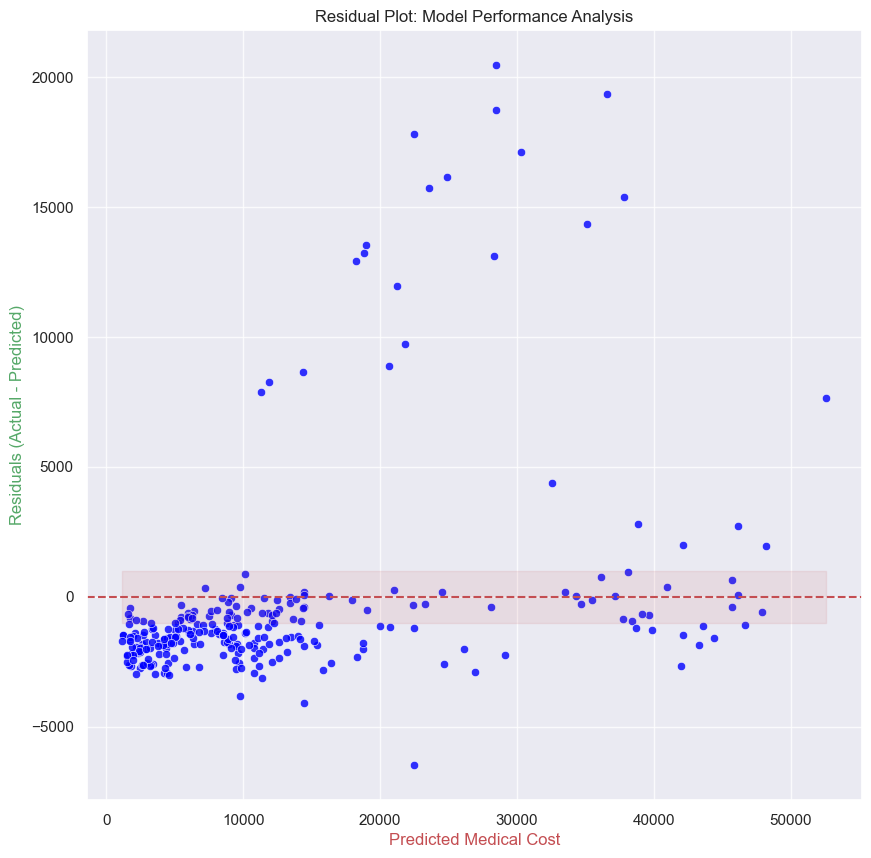

In [246]:
calc_residuals(y_test, y_pred_cat_tuned)

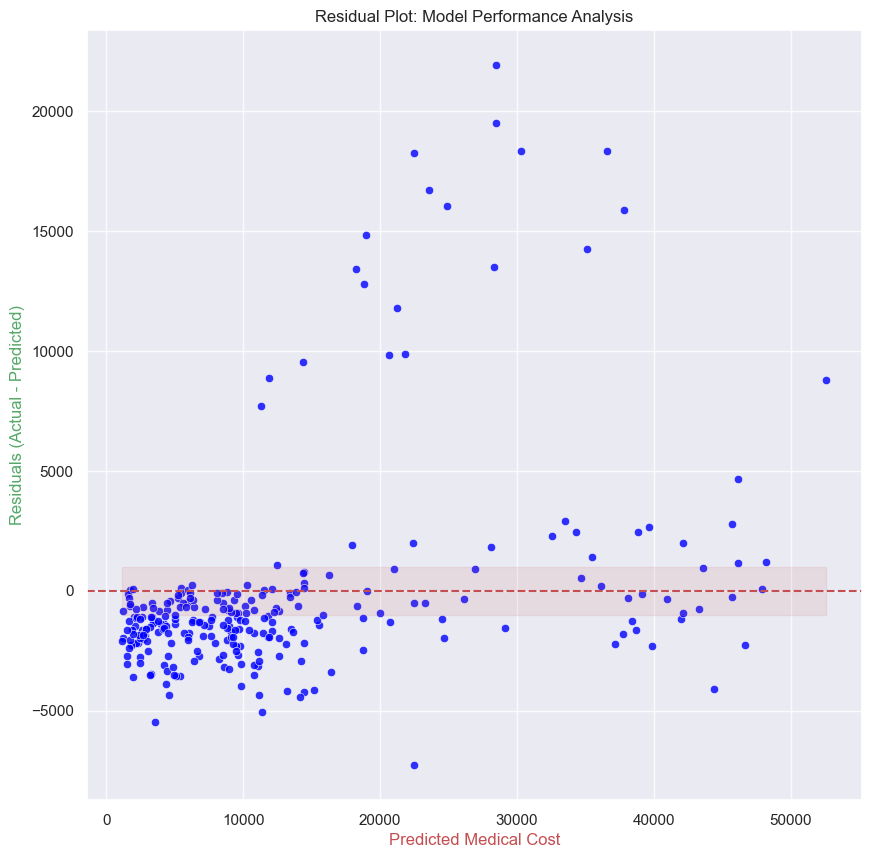

In [247]:
calc_residuals(y_test, y_pred_cat_self_tuned)

## 5. Random Forest
#### Random Forest Hyperparameters

- `n_estimators`: Number of trees in the forest. More trees generally improve performance but increase computation time.

- `max_depth`: Maximum depth of each tree. Controls the maximum number of levels in each decision tree. Deeper trees can capture more complex patterns but might overfit.

- `min_samples_leaf`: Minimum number of samples required to be at a leaf node. Increasing this value can prevent overfitting by ensuring that leaf nodes contain more samples.

- `min_samples_split`: Minimum number of samples required to split an internal node. A higher value prevents the model from learning overly specific patterns and helps to generalize better.

- `max_features`: Number of features to consider when looking for the best split. Limits the number of features each tree can use, which can reduce overfitting.
  - Values:
    - `'None'`: Uses all features.
    - `'log2'`: Uses the logarithm base 2 of the number of features.
    - `'sqrt'`: Uses the square root of the number of features.

- `bootstrap`: Whether bootstrap samples (samples with replacement) are used when building trees. If False, the entire dataset is used to build each tree.
  - Example values: `[True, False]`

- `criterion`: The function to measure the quality of a split. This is used only for regression tasks.
  - Values:
    - `'squared_error'`: Mean squared error (MSE) to evaluate splits.
    - `'absolute_error'`: Mean absolute error (MAE) to evaluate splits.
    - `'friedman_mse'`: Mean squared error with improvements based on the Friedman’s approach.
    - `'poisson'`: Poisson loss function for count data.


In [204]:
rf = RandomForestRegressor(random_state=42)

In [207]:
param_rf={
    'n_estimators': np.arange(50,500,50),
    'max_depth': np.arange(3,15,1),
    'min_samples_leaf': np.arange(2,15,5),
    'min_samples_split': [3, 5, 10, 15],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],  # Only valid for regression
}
rf_search=RandomizedSearchCV(rf,param_rf,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error',n_iter=100)
rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 2,  7, 12]),
                                        'min_samples_split': [3, 5, 10, 15],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   scoring='neg_mean_squared_error', verbose=1)

In [208]:
rf_search.best_params_

{'n_estimators': 350,
 'min_samples_split': 3,
 'min_samples_leaf': 7,
 'max_depth': 4,
 'criterion': 'friedman_mse',
 'bootstrap': True}

In [211]:
rf_model=rf_search.best_estimator_
y_pred_rf=rf_model.predict(X_test)

In [358]:
# Perform cross-validation on the training data
cross_score = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross Validation Score: {cross_score}")
print(f"Mean Cross Validation Score: {cross_score.mean():.4f}")

Cross Validation Score: [0.84418002 0.89205285 0.84639764 0.84105151 0.87392836]
Mean Cross Validation Score: 0.8595


In [359]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
print('.' * 50)
y_val_pred = rf_model.predict(X_val)
# Calculate evaluation metrics on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
explained_var_val = explained_variance_score(y_val, y_val_pred)

print(f"Validation Root Mean Squared Error: {rmse_val:.2f}")
print(f"Validation R2 Score: {r2_val:.4f}")
print(f"Validation Explained Variance: {explained_var_val:.4f}")

Making predictions on the validation set...
..................................................
Validation Root Mean Squared Error: 4413.73
Validation R2 Score: 0.8440
Validation Explained Variance: 0.8444


In [310]:
rmse_rf, r2_rf, cross_score_rf = model_evaluation(y_pred_rf, y_test, rf_model, X_train, y_train)
append_results('Random Forest', rmse_rf, r2_rf, cross_score_rf)

Root Mean Squared Error: 4257.03
R2 Score: 0.8772
Explained Variance: 0.8778
Cross Validation Score: 0.8595


,Prediction,Actual
0,7879.177460,6799.45800
1,6084.889138,4243.59005
2,13721.577528,13415.03810
3,6753.057706,6079.67150
4,4528.501270,22493.65964
...,...,...
263,48593.882797,48173.36100
264,10099.439717,8547.69130
265,35491.745695,34303.16720
266,15519.961918,14119.62000


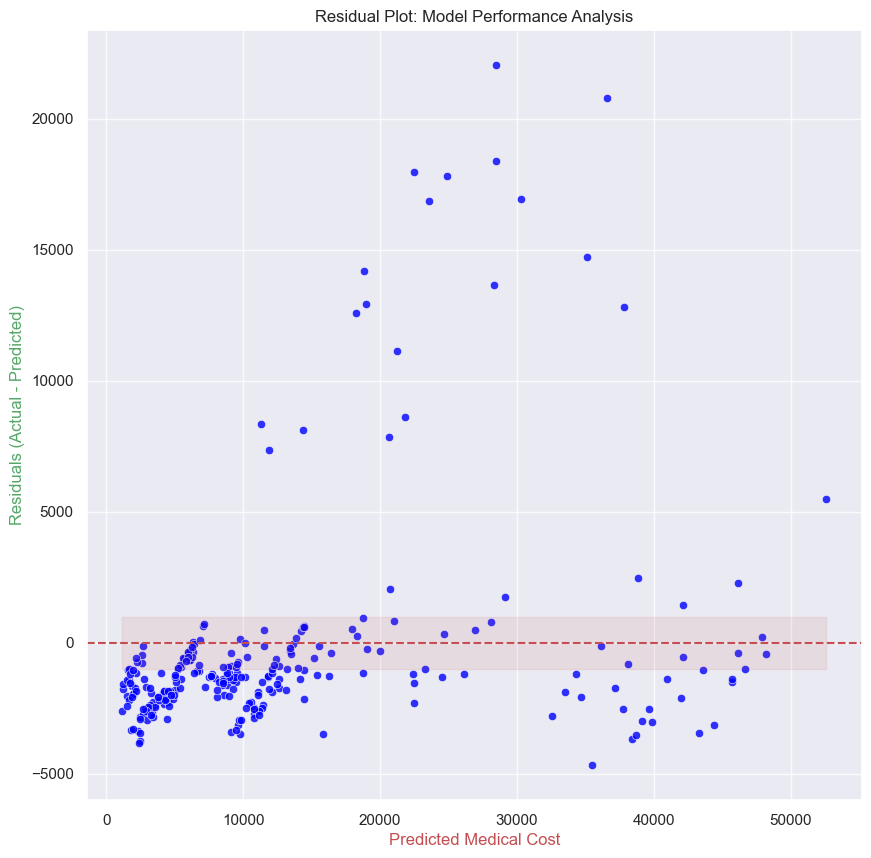

In [232]:
calc_residuals(y_test, y_pred_rf)

### Comparison Between Models


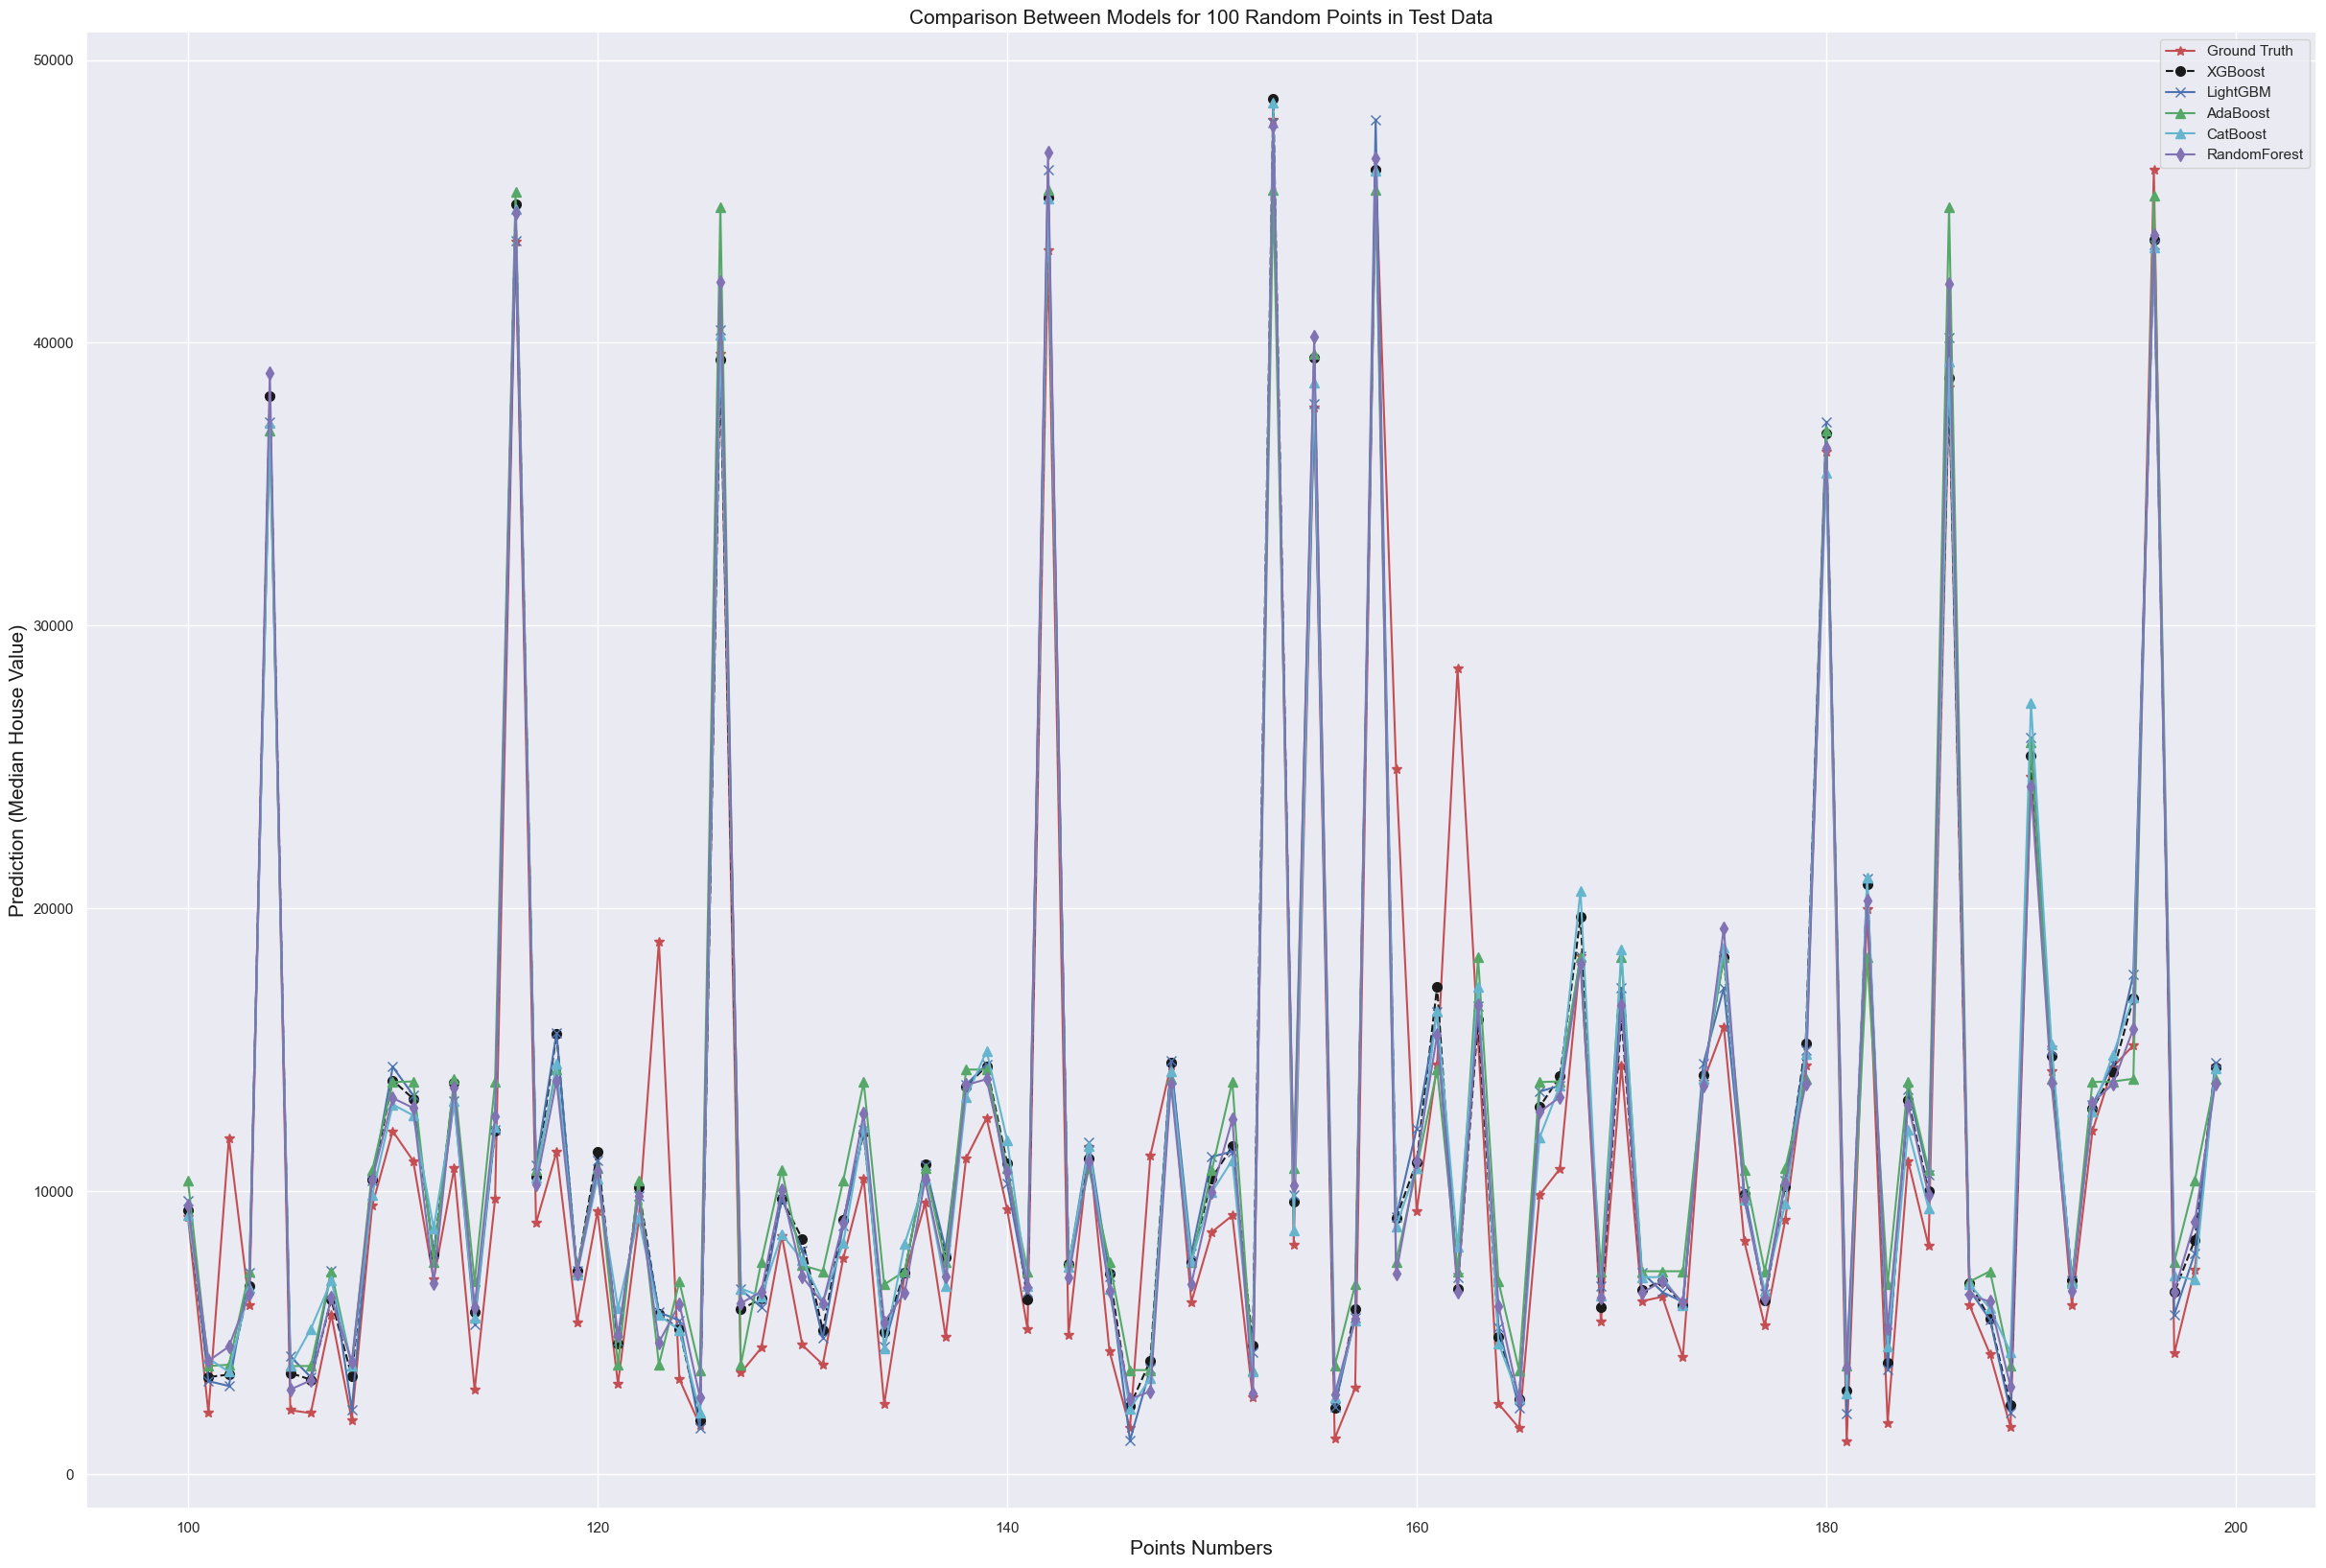

In [282]:
# X_axis numbers
x_x = np.arange(100, 200)

# plotting
plt.figure(figsize=(30, 20))
plt.plot(x_x, y_test.values[100:200], 'r*-', markersize=7, label="Ground Truth")  # Red stars with solid line
plt.plot(x_x, y_pred_xgb[100:200], 'ko--', markersize=7, label="XGBoost")  # Black circles with dashed line
plt.plot(x_x, y_pred_lgbm[100:200], 'bx-', markersize=7, label="LightGBM")  # Blue crosses with solid line
plt.plot(x_x, y_pred_ada[100:200], 'g^-', markersize=7, label="AdaBoost")  # Green triangles up with solid line
plt.plot(x_x, y_pred_cat_tuned[100:200], 'c^-', markersize=7, label="CatBoost")  # Cyan triangles up with solid line
plt.plot(x_x, y_pred_rf[100:200], 'md-', markersize=7, label="RandomForest")  # Magenta diamonds with solid line

# Adjusted title
plt.title("Comparison Between Models for 100 Random Points in Test Data", fontsize=15, color="k")
plt.xlabel("Points Numbers", fontsize=15, color="k")
plt.ylabel("Prediction (Median House Value)", fontsize=15, color="k")
plt.legend()
plt.grid(True)
plt.show()


In [321]:
pd.DataFrame(results)

,Model,RMSE,R2,CVS
0,XGBoost,4178.772198,0.881639,0.857030
1,AdaBoost,4547.216455,0.859847,0.848962
2,LightGBM,4171.443344,0.882054,0.853582
3,CatBoost Tuned,4208.624495,0.879942,0.857286
4,CatBoost Self Tuned,4419.355124,0.867618,0.834872
5,Random Forest,4257.031727,0.877164,0.859522


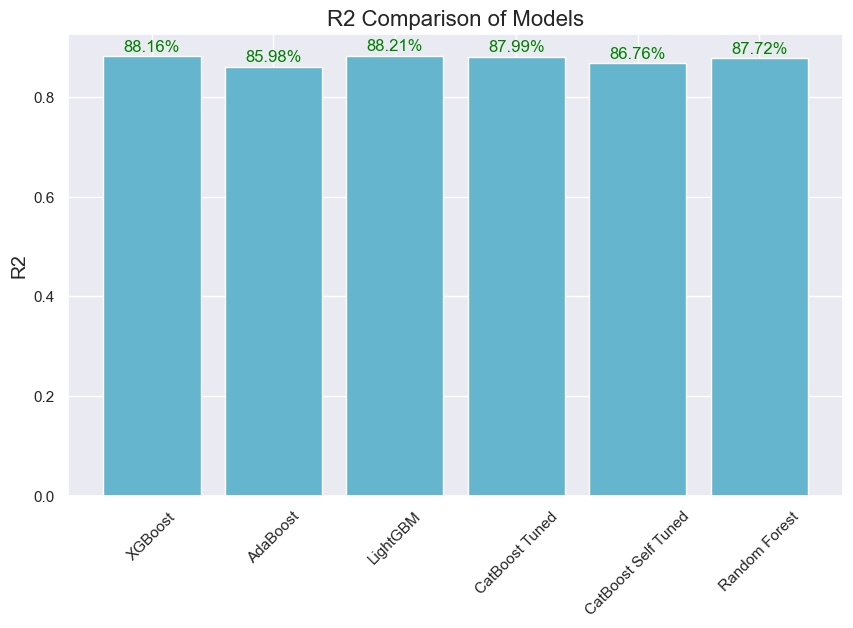

In [322]:
plt.figure(figsize=(10,6))
plt.bar(results['Model'],results['R2'],color='c')
for i,value in enumerate(results['R2']):
    plt.text(i, value + .01 , f'{value*100:.2f}%', ha='center', fontsize=12, color='green')
plt.title('R2 Comparison of Models', fontsize=16)
plt.ylabel('R2', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [350]:
models=['XGBoost','AdaBoost','LightGBM','Random Forest',"CatBoost 'Tuned'","CatBoost 'Self Tuned'"]
y_pred_list=[y_pred_xgb,y_pred_ada,y_pred_lgbm,y_pred_rf,y_pred_cat_tuned,y_pred_cat_self_tuned]

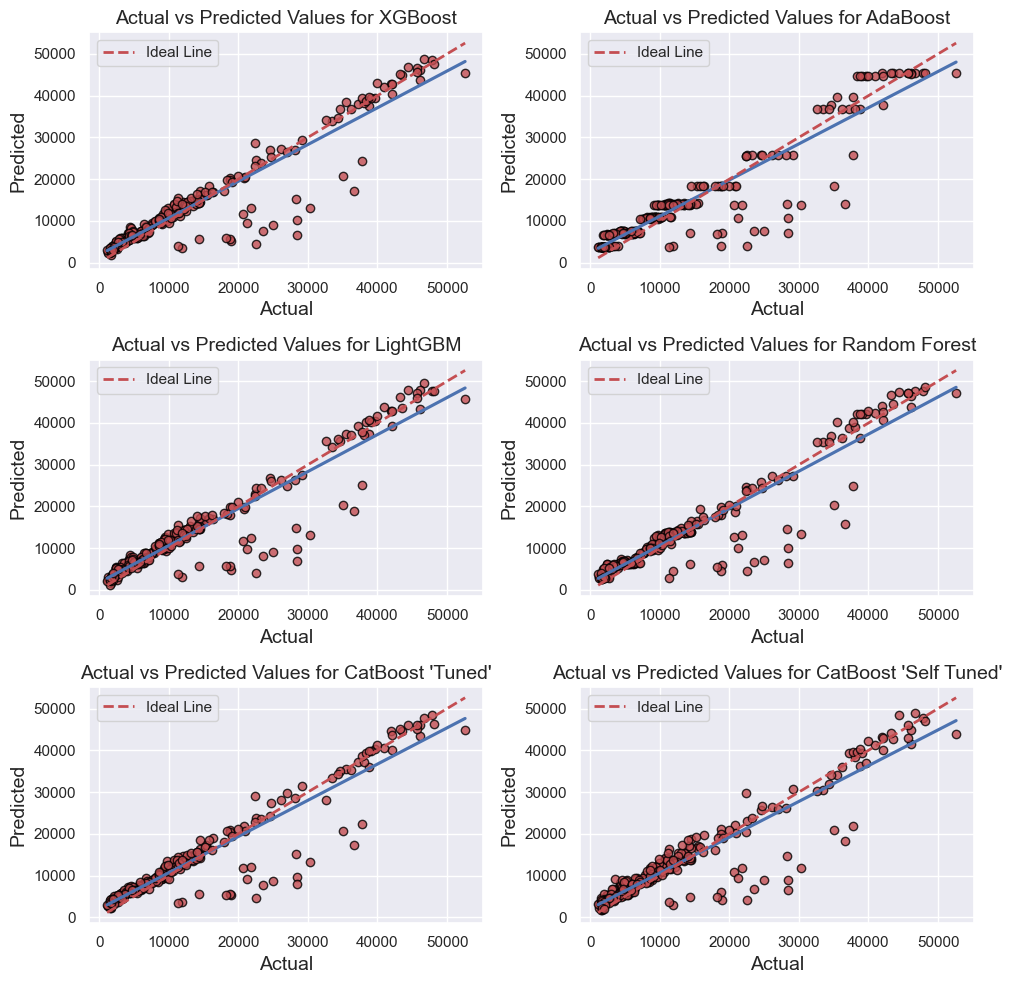

In [357]:
plt.figure(figsize=(10,10))
i=0
for model,y_pred in zip(models,y_pred_list):
    plt.subplot(3,2,i+1)
    # Make sure that the values are 1D arrays
    y_test=np.squeeze(y_test)
    y_pred=np.squeeze(y_pred)
    
    # Make sure that the values are numerical
    y_test = pd.to_numeric(y_test, errors='coerce')
    y_pred = pd.to_numeric(y_pred, errors='coerce')
    
    sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'r','edgecolor':'black'},line_kws={'color':'b'},ci=None)
    
    # Adding the Reference Line to show the ideal case
    min_val=min(min(y_test),min(y_pred_xgb))
    max_val=max(max(y_test),max(y_pred_xgb))
    plt.plot([min_val,max_val],[min_val,max_val],color='r',linestyle='--',lw=2,label='Ideal Line')
    
    plt.title(f'Actual vs Predicted Values for {model}', fontsize=14)
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.legend()
    i+=1
    
plt.tight_layout()
plt.show()

